In [1]:
# Imports
import math
import nltk
from nltk.corpus import cess_esp
import matplotlib.pyplot as plt

In [2]:
nltk.download('cess_esp')
nltk.download('punkt')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:

# Carga del corpus                         
corpus_sentences=cess_esp.tagged_sents()
number_sentences=len(corpus_sentences)

In [4]:
# Preprocesar etiquetas corpus
corpus = []
for s in (corpus_sentences):
    sentence=[]
    for x in s:
        word, tag = x
        if(word=='*0*' and tag.startswith('sn')):
            continue
        if(len(tag) >= 3):
            if(tag.startswith('v') or tag.startswith('F')):
                tag = tag[0:3]
            else:
                tag = tag[0:2]
        x = (word, tag)
        sentence.append(x)
    corpus.append(sentence)

In [5]:
number_train = round(len(corpus) * 0.9)
train = corpus[0 : number_train + 1]
test = corpus[number_train + 1 :]

In [6]:
# Uso del etiquetador morfosintáctico hmm
from nltk.tag import hmm

tagger_hmm=hmm.HiddenMarkovModelTagger.train(train)
ac = tagger_hmm.evaluate(test)
print('Accuracy of the model: '+ str(ac))

frase = 'Me gusta mucho viajar por el mundo'
frase_tokens = nltk.word_tokenize(frase, language='spanish')
tagged_sentence = tagger_hmm.tag(frase_tokens)
print(tagged_sentence)

Accuracy of the model: 0.8784649776453055
[('Me', 'pp'), ('gusta', 'vmi'), ('mucho', 'rg'), ('viajar', 'vmn'), ('por', 'sp'), ('el', 'da'), ('mundo', 'nc')]


In [7]:
# Uso del etiquetador morfosintáctico tnt
from nltk.tag import tnt

tagger_tnt = tnt.TnT()
tagger_tnt.train(train)
ac = tagger_tnt.evaluate(test)
print('Accuracy of the model: '+ str(ac))
frase = 'Me gusta mucho viajar por el mundo'
frase_tokens = nltk.word_tokenize(frase, language='spanish')
tagged_sentence = tagger_tnt.tag(frase_tokens)
print(tagged_sentence)

Accuracy of the model: 0.825558867362146
[('Me', 'pp'), ('gusta', 'vmi'), ('mucho', 'rg'), ('viajar', 'vmn'), ('por', 'sp'), ('el', 'da'), ('mundo', 'nc')]


# **Hidden Markov Models Approach(HMM)**

Original corpus accuracy: [0.9283174828904097, 0.9237111533931321, 0.9228301472203911, 0.9251465103889185, 0.9228631913204551, 0.8781806196440343, 0.887891425743974, 0.8913107511045656, 0.8911650954798163, 0.8784427571832664]
Original corpus deviation: [0.020589808319485307, 0.0211882961050311, 0.02130012430832227, 0.021004323505633294, 0.021295944733093083, 0.026106432740275777, 0.02518237930077728, 0.024843071059600663, 0.024857680382111613, 0.026082220904978973]
Shuffled corpus accuracy: [0.9230154501864678, 0.9271860439917651, 0.9253762110904968, 0.9270658358168518, 0.9275133111919448, 0.923371028540657, 0.9294629746171597, 0.9264728662157278, 0.9219396480388371, 0.92490440989039]
Shuffled corpus deviation: [0.02127667147482957, 0.020739017201654584, 0.020974674440455466, 0.020754783566048533, 0.020696009814193807, 0.021231566363307017, 0.020437230020861542, 0.020832317501876856, 0.021412329308895608, 0.021035510567581447]


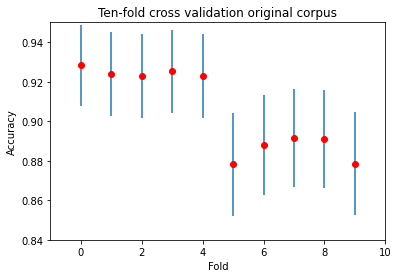

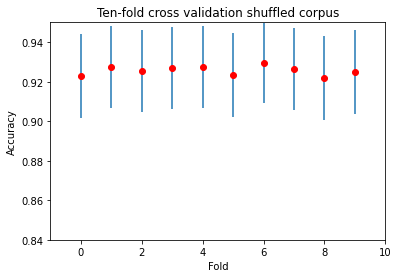

In [8]:
# Partir el corpus en train y test
from nltk.tag import hmm
from sklearn.model_selection import KFold
import numpy as np

c = np.array(corpus, dtype=object)

# Ten-fold cross-validation

# Resultados sin shuffle 
kf = KFold(n_splits=10, shuffle=False)

non_shuffled_results = []
non_shuffled_conf = []

for train_index, test_index in kf.split(c):
    number_test_sentences = len(test_index)
    train = c[train_index]
    test = c[test_index]
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(train)
    ac = tagger_hmm.evaluate(test)
    non_shuffled_results.append(ac)
    ic = 1.96*math.sqrt((ac* (1-ac))/number_test_sentences)
    non_shuffled_conf.append(ic)

print('Original corpus accuracy: ' + str(non_shuffled_results))
print('Original corpus deviation: ' + str(non_shuffled_conf))

# Resultados con shuffle 

kf = KFold(n_splits=10, shuffle=True)

shuffled_results =[]
shuffled_conf = []

for train_index, test_index in kf.split(c):
    number_test_sentences = len(test_index)
    train = c[train_index]
    test = c[test_index]
    tagger_hmm=hmm.HiddenMarkovModelTagger.train(train)
    ac = tagger_hmm.evaluate(test)
    shuffled_results.append(ac)
    ic = 1.96*math.sqrt((ac* (1-ac))/number_test_sentences)
    shuffled_conf.append(ic)

print('Shuffled corpus accuracy: ' + str(shuffled_results))
print('Shuffled corpus deviation: ' + str(shuffled_conf))

# Print graphic for original results
x=[i for i in range(10)]
y=non_shuffled_results
plt.axis([-1, 10, 0.84, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation original corpus')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=non_shuffled_conf,linestyle='None')
plt.show()

# Print graphic for shuffled results
x=[i for i in range(10)]
y=shuffled_results
plt.axis([-1, 10, 0.84, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation shuffled corpus')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=shuffled_conf,linestyle='None')
plt.show()

#**Trigrams'n'Tags (TNT)**

Original corpus accuracy: [0.8963203270820371, 0.8886019751744133, 0.8864864864864865, 0.88949564908542, 0.8928287906853665, 0.8389584706657878, 0.8583445253410618, 0.8506627393225331, 0.8591370558375635, 0.8255173440524044]
Original corpus deviation: [0.02433189016196915, 0.025112491206031224, 0.025319624362368197, 0.02502413177278914, 0.024689970674732113, 0.02933841111855451, 0.027832032178867174, 0.028448554921733562, 0.02776687604508008, 0.030292606824607833]
Shuffled corpus accuracy: [0.9027800625102813, 0.8981251650382889, 0.9039718194813151, 0.8977773062437006, 0.900850887205562, 0.9011120151885001, 0.9003003325109943, 0.9032709274800946, 0.9022802972072764, 0.9025301590690723]
Shuffled corpus deviation: [0.023646456184858677, 0.024143448772825392, 0.023516582626755492, 0.02417994938973096, 0.023854388431810213, 0.02382640770280697, 0.02391321538326534, 0.023593096456475962, 0.02370059346748244, 0.0236735509553767]


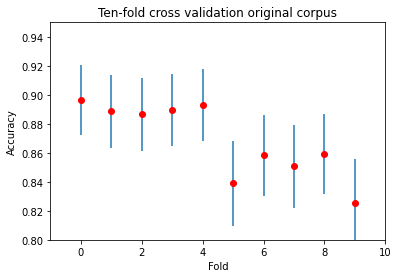

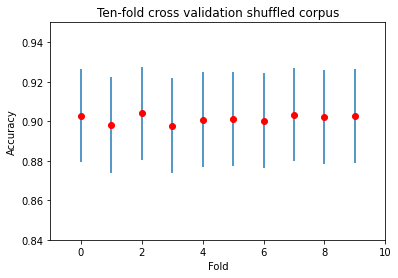

In [9]:
# Partir el corpus en train y test
from nltk.tag import tnt
from sklearn.model_selection import KFold
import numpy as np

c = np.array(corpus, dtype=object)

# Ten-fold cross-validation
# Resultados sin shuffle 
kf = KFold(n_splits=10, shuffle=False)

non_shuffled_results = []
non_shuffled_conf = []

for train_index, test_index in kf.split(c):
    number_test_sentences = len(test_index)
    train = c[train_index]
    test = c[test_index]
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(train)
    ac = tagger_tnt.evaluate(test)
    non_shuffled_results.append(ac)
    ic = 1.96 * math.sqrt( ac * (1-ac) / number_test_sentences)
    non_shuffled_conf.append(ic)

print('Original corpus accuracy: ' + str(non_shuffled_results))
print('Original corpus deviation: ' + str(non_shuffled_conf))

# Resultados con shuffle 
kf = KFold(n_splits=10, shuffle=True)

shuffled_results =[]
shuffled_conf = []
for train_index, test_index in kf.split(c):
    number_test_sentences = len(test_index)
    train = c[train_index]
    test = c[test_index]
    tagger_tnt = tnt.TnT()
    tagger_tnt.train(train)
    ac = tagger_tnt.evaluate(test)
    shuffled_results.append(ac)
    ic = 1.96 * math.sqrt(ac * (1-ac) / number_test_sentences)
    shuffled_conf.append(ic)

print('Shuffled corpus accuracy: ' + str(shuffled_results))
print('Shuffled corpus deviation: ' + str(shuffled_conf))

# Print graphic for original results
x=[i for i in range(10)]
y=non_shuffled_results
plt.axis([-1, 10, 0.8, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation original corpus')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=non_shuffled_conf,linestyle='None')
plt.show()

# Print graphic for shuffled results
x=[i for i in range(10)]
y=shuffled_results
plt.axis([-1, 10, 0.84, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation shuffled corpus')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=shuffled_conf,linestyle='None')
plt.show()